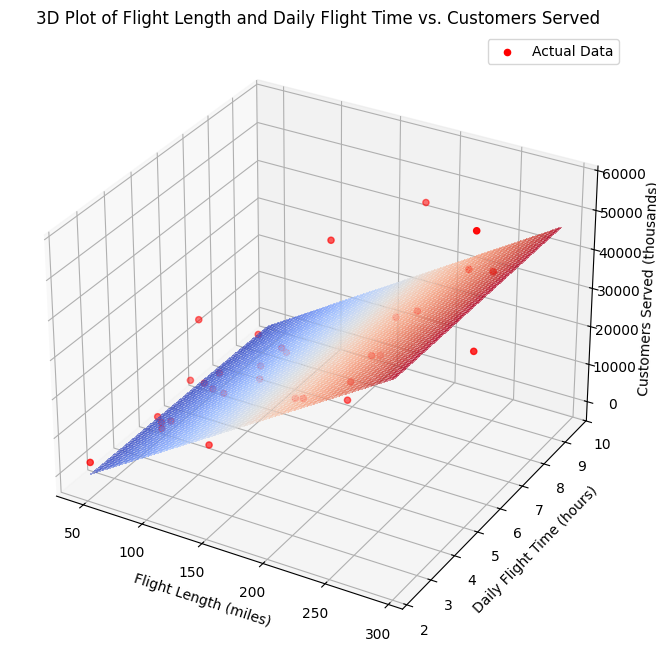

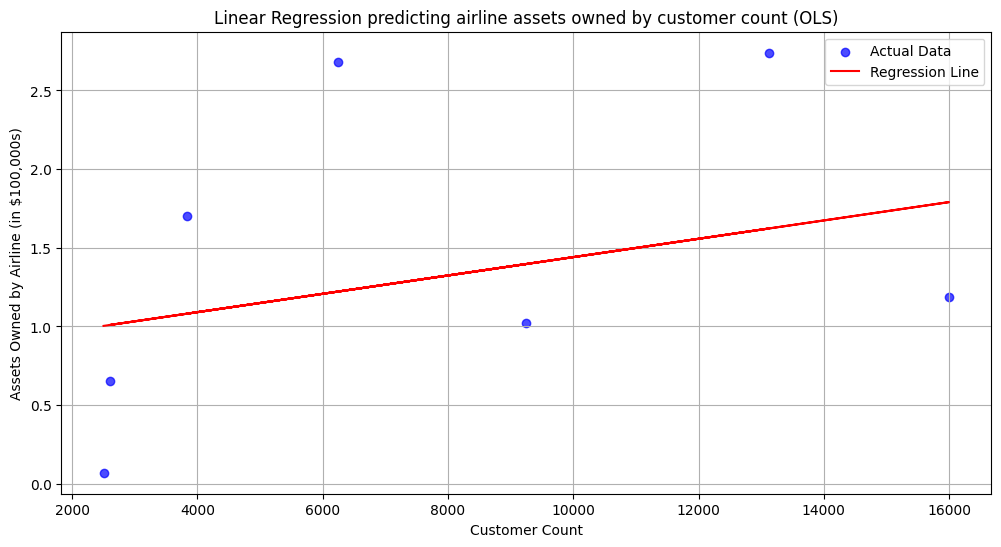

In [14]:
# Exercise 4.2

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading dataset
file_path = "AirlineCosts.csv"
df = pd.read_csv(file_path)

# Renaming columns for better clarity
df.columns = [
    "Airline Name",
    "Flight Length (miles)",
    "Plane Speed (mph)",
    "Daily Flight Time (hours)",
    "Customers Served (thousands)",
    "Operating Costs (cents/ton-mile)",
    "Total Assets ($100,000s)",
    "Investments & Special Funds"
]

# Model 1 to Predict Customers Served
X1 = df[["Flight Length (miles)", "Daily Flight Time (hours)"]]
y1 = df["Customers Served (thousands)"]

# Splitting data into training and testing sets for Model 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Training the model for Customers Served
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predictions and evaluation for Customers Served
y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

# 3D Plot for Customers Served
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate a meshgrid for the 3D plot based on input features
X_mesh, Y_mesh = np.meshgrid(
    np.linspace(X1["Flight Length (miles)"].min(), X1["Flight Length (miles)"].max(), 100),
    np.linspace(X1["Daily Flight Time (hours)"].min(), X1["Daily Flight Time (hours)"].max(), 100)
)

# Predict Z values (Customers Served) using the trained model
Z_mesh = model1.intercept_ + model1.coef_[0] * X_mesh + model1.coef_[1] * Y_mesh

# Plot the surface for predictions
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap="coolwarm", alpha=0.5, linewidth=0, antialiased=False)

# Add scatter plot of actual data
ax.scatter(X1["Flight Length (miles)"], X1["Daily Flight Time (hours)"], y1, color="red", label="Actual Data")

# Label the axes
ax.set_xlabel("Flight Length (miles)")
ax.set_ylabel("Daily Flight Time (hours)")
ax.set_zlabel("Customers Served (thousands)")
ax.set_title("3D Plot of Flight Length and Daily Flight Time vs. Customers Served")

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Model 2 to Predict Total Assets
X2 = df[["Customers Served (thousands)"]]
y2 = df["Total Assets ($100,000s)"]

# Splitting data into training and testing sets for Model 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Training the model for Total Assets
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predictions and evaluation for Total Assets
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

# Scatter plot with regression line for Total Assets
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.scatter(X2_test, y2_test, color="blue", label="Actual Data", alpha=0.7)

# Regression line for predictions
plt.plot(X2_test, y2_pred, color="red", label="Regression Line")

# Label the axes
plt.xlabel("Customer Count")
plt.ylabel("Assets Owned by Airline (in $100,000s)")
plt.title("Linear Regression predicting airline assets owned by customer count (OLS)")

# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


Top Predictors for NOX: ['indus', 'age', 'tax']
Top Predictors for MEDV: ['tax', 'indus', 'ptratio']

Model 1: Predict NOX
Mean Squared Error: 0.0036
R-squared: 0.6891

Model 2: Predict MEDV
Mean Squared Error: 43.7366
R-squared: 0.4036


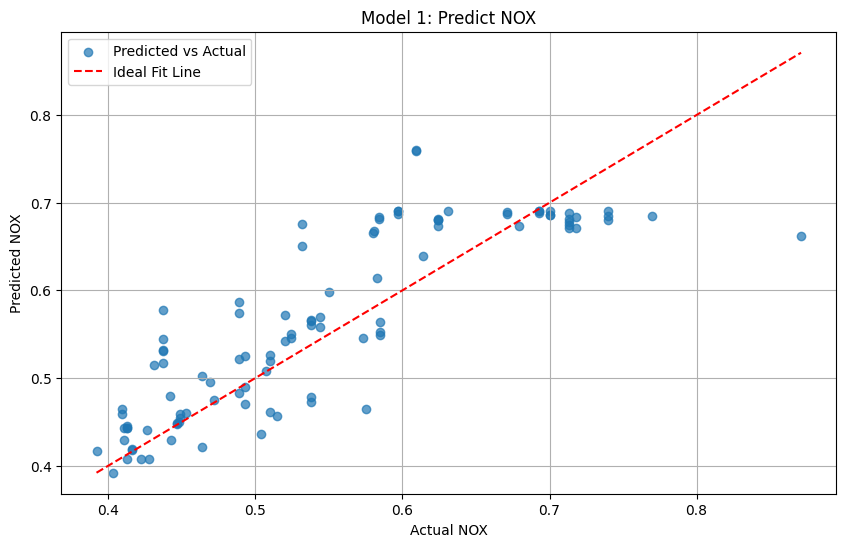

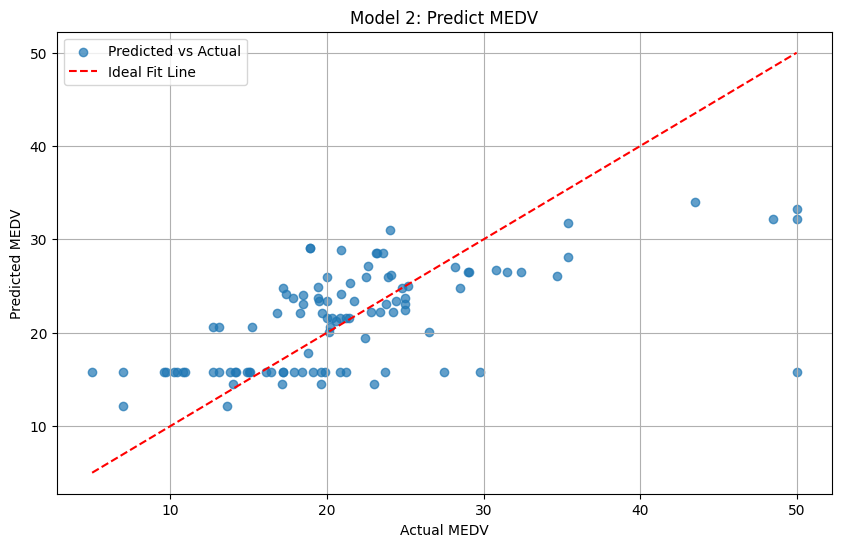

In [4]:
# Exercise 4.3

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading dataset
file_path = "Boston.csv"  
boston_df = pd.read_csv(file_path)

# Correlation analysis
correlation_matrix = boston_df.corr()

# Top predictors for NOX
nox_correlation = correlation_matrix["nox"].sort_values(ascending=False)
top_predictors_nox = nox_correlation.index[1:4]  # Select top 3 predictors (excluding 'nox' itself)

# Top predictors for MEDV
medv_correlation = correlation_matrix["medv"].sort_values(ascending=False)
top_predictors_medv = medv_correlation.index[-4:-1]  # Select top 3 predictors (excluding 'medv' itself)

print("Top Predictors for NOX:", top_predictors_nox.tolist())
print("Top Predictors for MEDV:", top_predictors_medv.tolist())

# Model 1 to Predict NOX
X_nox = boston_df[top_predictors_nox]
y_nox = boston_df["nox"]

# Spliting data into training and testing sets
X_nox_train, X_nox_test, y_nox_train, y_nox_test = train_test_split(X_nox, y_nox, test_size=0.2, random_state=42)

# Training the model
model_nox = LinearRegression()
model_nox.fit(X_nox_train, y_nox_train)

# Predictions and evaluation for NOX
y_nox_pred = model_nox.predict(X_nox_test)
mse_nox = mean_squared_error(y_nox_test, y_nox_pred)
r2_nox = r2_score(y_nox_test, y_nox_pred)

# Model 2 to Predict MEDV
X_medv = boston_df[top_predictors_medv]
y_medv = boston_df["medv"]

# Spliting data into training and testing sets
X_medv_train, X_medv_test, y_medv_train, y_medv_test = train_test_split(X_medv, y_medv, test_size=0.2, random_state=42)

# Training the model
model_medv = LinearRegression()
model_medv.fit(X_medv_train, y_medv_train)

# Predictions and evaluation for MEDV
y_medv_pred = model_medv.predict(X_medv_test)
mse_medv = mean_squared_error(y_medv_test, y_medv_pred)
r2_medv = r2_score(y_medv_test, y_medv_pred)

# Print evaluation metrics
print("\nModel 1: Predict NOX")
print(f"Mean Squared Error: {mse_nox:.4f}")
print(f"R-squared: {r2_nox:.4f}")

print("\nModel 2: Predict MEDV")
print(f"Mean Squared Error: {mse_medv:.4f}")
print(f"R-squared: {r2_medv:.4f}")

# Plot for Model 1: NOX
plt.figure(figsize=(10, 6))
plt.scatter(y_nox_test, y_nox_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([y_nox_test.min(), y_nox_test.max()], [y_nox_test.min(), y_nox_test.max()], color="red", linestyle="--", label="Ideal Fit Line")
plt.title("Model 1: Predict NOX")
plt.xlabel("Actual NOX")
plt.ylabel("Predicted NOX")
plt.legend()
plt.grid()
plt.show()

# Plot for Model 2: MEDV
plt.figure(figsize=(10, 6))
plt.scatter(y_medv_test, y_medv_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([y_medv_test.min(), y_medv_test.max()], [y_medv_test.min(), y_medv_test.max()], color="red", linestyle="--", label="Ideal Fit Line")
plt.title("Model 2: Predict MEDV")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.legend()
plt.grid()
plt.show()



Coefficients Comparison:
   Feature Lasso Coefficients  Ridge Coefficients
0  Length1         229.963441          125.424825
1  Length2                  -          104.132359
2  Length3                  -            0.788332
3   Height          44.015334           42.166448
4    Width          75.780514           76.696044

Formatted Results:
Length1:
  Ridge: 125.4248
  Lasso: 229.96344142545493
Length2:
  Ridge: 104.1324
  Lasso: -
Length3:
  Ridge: 0.7883
  Lasso: -
Height:
  Ridge: 42.1664
  Lasso: 44.01533366404389
Width:
  Ridge: 76.6960
  Lasso: 75.78051358762877


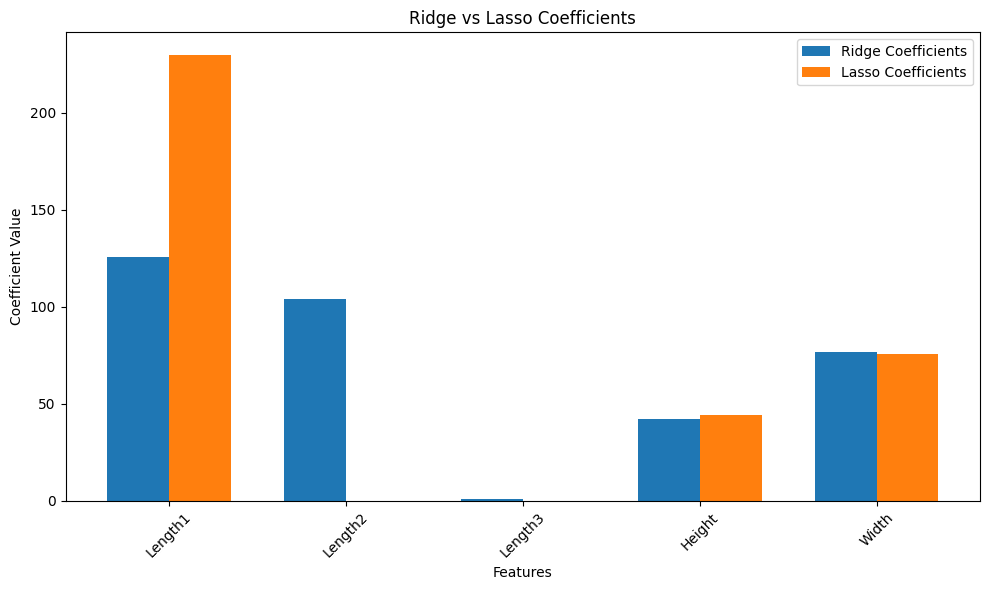

In [38]:
# Exercise 4.5 (Ridge and Lasso Regression)

# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading Fish Market dataset
file_path = "fish.csv"  # Replace with your file path if necessary
fish_df = pd.read_csv(file_path)

# Selecting features and target variable
X = fish_df[["Length1", "Length2", "Length3", "Height", "Width"]]
y = fish_df["Weight"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge_alpha = 1.0  # Regularization strength for Ridge
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train_scaled, y_train)
ridge_coefficients = ridge_model.coef_

# Lasso Regression
lasso_alpha = 1.0  # Adjusted regularization strength for Lasso to induce sparsity
lasso_model = Lasso(alpha=lasso_alpha, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
lasso_coefficients = lasso_model.coef_

# Clean Lasso coefficients (replace near-zero values with "-")
lasso_coefficients_cleaned = [coef if abs(coef) > 1e-2 else "-" for coef in lasso_coefficients]

# Prepare results for output
coefficients_df = pd.DataFrame({
    "Feature": ["Length1", "Length2", "Length3", "Height", "Width"],
    "Lasso Coefficients": lasso_coefficients_cleaned,
    "Ridge Coefficients": ridge_coefficients
})

# Print the coefficients comparison in table format
print("\nCoefficients Comparison:")
print(coefficients_df)

# Display formatted results
print("\nFormatted Results:")
for feature, ridge_coef, lasso_coef in zip(coefficients_df["Feature"], 
                                           coefficients_df["Ridge Coefficients"], 
                                           coefficients_df["Lasso Coefficients"]):
    print(f"{feature}:")
    print(f"  Ridge: {ridge_coef:.4f}" if isinstance(ridge_coef, (int, float)) else f"  Ridge: {ridge_coef}")
    print(f"  Lasso: {lasso_coef}" if lasso_coef != "-" else "  Lasso: -")

# Plot Ridge and Lasso coefficients
plt.figure(figsize=(10, 6))
width = 0.35  # Bar width
features = range(len(X.columns))
plt.bar([f - width/2 for f in features], ridge_coefficients, width, label="Ridge Coefficients")
plt.bar([f + width/2 for f in features], 
        [coef if coef != "-" else 0 for coef in lasso_coefficients_cleaned], 
        width, label="Lasso Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients")
plt.xticks(features, ["Length1", "Length2", "Length3", "Height", "Width"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Model 1 (Budget and Aggregate Followers):
Intercept: 6.0542
Coefficients: [5.23181498e-09 1.57478112e-08]
Mean Squared Error: 0.6707
R-squared: 0.0054


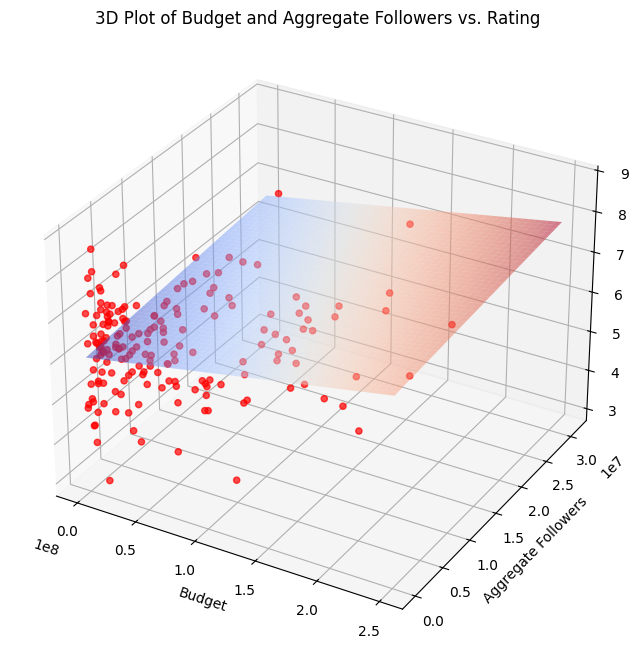


Model 2 (Including Social Media Metrics):
Intercept: 6.1368
Coefficients: [ 5.63430735e-09  1.09876413e-08  1.39178518e-05 -2.49015985e-04
 -4.90379661e-05]
Mean Squared Error: 0.5917
R-squared: 0.1226

Feature Importance (Ranked by Absolute Coefficient):
               Feature   Coefficient
3             Dislikes -2.490160e-04
4             Comments -4.903797e-05
2                Likes  1.391785e-05
1  Aggregate Followers  1.098764e-08
0               Budget  5.634307e-09
Iteration 0: m = -0.000005, b = 0.000129, Loss = 42.421093
Iteration 200: m = -0.000907, b = 0.025826, Loss = 42.090509
Iteration 400: m = -0.001806, b = 0.051420, Loss = 41.762559
Iteration 600: m = -0.002701, b = 0.076912, Loss = 41.437222
Iteration 800: m = -0.003593, b = 0.102303, Loss = 41.114477
Iteration 1000: m = -0.004481, b = 0.127592, Loss = 40.794304
Iteration 1200: m = -0.005366, b = 0.152780, Loss = 40.476682
Iteration 1400: m = -0.006247, b = 0.177867, Loss = 40.161592
Iteration 1600: m = -0.007125, b

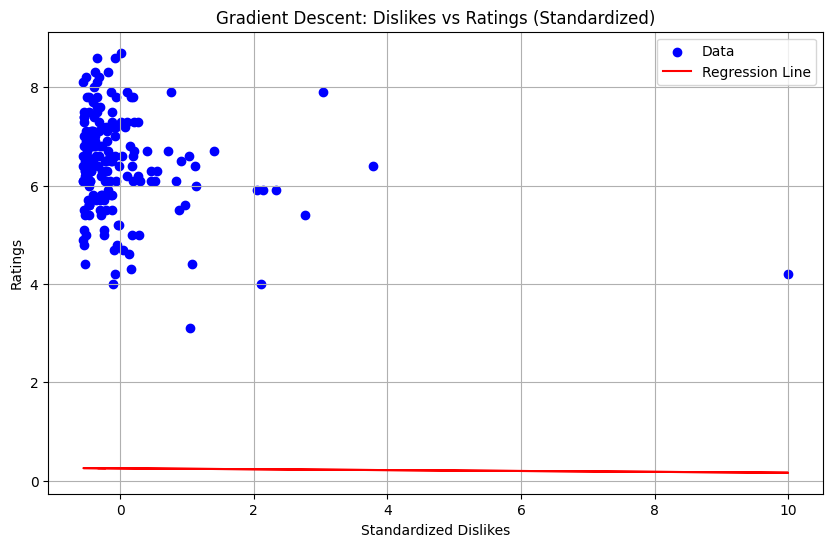

In [14]:
# Exercise 4.7

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loading dataset
file_path = 'csm.xlsx'  
movie_data = pd.read_excel(file_path)

# Handle Missing Values
movie_data_cleaned = movie_data.dropna()

# Part 1: Analyzing Budget and Aggregate Followers as Predictors of Ratings
X1 = movie_data_cleaned[["Budget", "Aggregate Followers"]]
y = movie_data_cleaned["Ratings"]

# Splitting data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Coefficients and Evaluation Metrics
coefficients1 = model1.coef_
intercept1 = model1.intercept_
y_pred1 = model1.predict(X1_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("\nModel 1 (Budget and Aggregate Followers):")
print(f"Intercept: {intercept1:.4f}")
print(f"Coefficients: {coefficients1}")
print(f"Mean Squared Error: {mse1:.4f}")
print(f"R-squared: {r2_1:.4f}")

# 3D Plot of Budget, Aggregate Followers, and Ratings
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(movie_data_cleaned["Budget"], movie_data_cleaned["Aggregate Followers"], y, color='red', alpha=0.7)

# Create a meshgrid for predictions
budget_range = np.linspace(X1["Budget"].min(), X1["Budget"].max(), 50)
followers_range = np.linspace(X1["Aggregate Followers"].min(), X1["Aggregate Followers"].max(), 50)
B, F = np.meshgrid(budget_range, followers_range)

# Predict Ratings on the meshgrid
R = intercept1 + coefficients1[0] * B + coefficients1[1] * F

# Surface plot
ax.plot_surface(B, F, R, cmap='coolwarm', alpha=0.5)

# Labels
ax.set_xlabel('Budget')
ax.set_ylabel('Aggregate Followers')
ax.set_zlabel('Ratings')
ax.set_title('3D Plot of Budget and Aggregate Followers vs. Rating')

plt.show()

# Part 2: Incorporating Likes, Dislikes, and Comments into the Prediction
X2 = movie_data_cleaned[["Budget", "Aggregate Followers", "Likes", "Dislikes", "Comments"]]

# Splitting data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model2 = LinearRegression()
model2.fit(X2_train, y_train)

# Coefficients and Evaluation Metrics
coefficients2 = model2.coef_
intercept2 = model2.intercept_
y_pred2 = model2.predict(X2_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 2 (Including Social Media Metrics):")
print(f"Intercept: {intercept2:.4f}")
print(f"Coefficients: {coefficients2}")
print(f"Mean Squared Error: {mse2:.4f}")
print(f"R-squared: {r2_2:.4f}")

# Display Feature Importance (by Absolute Coefficient)
feature_importance = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": coefficients2
}).sort_values(by="Coefficient", key=np.abs, ascending=False)

print("\nFeature Importance (Ranked by Absolute Coefficient):")
print(feature_importance)

# Part 3: Gradient Descent on the Best Predictor (Dislikes)
# Standardize the 'Dislikes' feature
scaler = StandardScaler()
X_dislikes_scaled = scaler.fit_transform(movie_data_cleaned[["Dislikes"]]).flatten()
y_ratings = y.values

# Gradient Descent Function
def gradient_descent(X, y, lr=1e-5, iterations=2000):
    m = 0
    b = 0
    n = len(y)
    for i in range(iterations):
        y_pred = m * X + b
        dm = (-2 / n) * np.sum(X * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)
        m -= lr * dm
        b -= lr * db
        
        # Monitor progress every 200 iterations
        if i % 200 == 0:
            loss = np.mean((y - y_pred) ** 2)
            print(f"Iteration {i}: m = {m:.6f}, b = {b:.6f}, Loss = {loss:.6f}")
    return m, b

# Applying gradient descent with Updated Learning Rate
m, b = gradient_descent(X_dislikes_scaled, y_ratings, lr=1e-5, iterations=2000)

print("\nGradient Descent Results (Using Scaled Dislikes):")
print(f"Optimal Gradient (Slope): {m:.4f}")
print(f"Optimal Intercept: {b:.4f}")

# Plot the updated regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_dislikes_scaled, y_ratings, color="blue", label="Data")
plt.plot(X_dislikes_scaled, m * X_dislikes_scaled + b, color="red", label="Regression Line")
plt.xlabel("Standardized Dislikes")
plt.ylabel("Ratings")
plt.title("Gradient Descent: Dislikes vs Ratings (Standardized)")
plt.legend()
plt.grid()
plt.show()
